In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import random

In [14]:
image_path = r"C:\Users\Student\Desktop\OIP (1).jpg"
invert = True


In [15]:
import numpy as np
import matplotlib.pyplot as plt

def plotimage(img, title=None, figsize=None, invert=False):
    if invert:
        img = np.max(img) - img.copy()

    h = img.shape[0]
    w = img.shape[1]
    dpi = 80
    if figsize is None:
        figsize = w / float(dpi), h / float(dpi)
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('off')
    ax.imshow(img, cmap='gray')
    if title:
        plt.title(title)
    plt.show()



In [16]:
def gray_to_bw(gray, thresh):
 '''
 Returns a new image
 '''
 bw = gray.copy()
 bw[bw<thresh]=0
 bw[bw>=thresh]=255
 return bw 

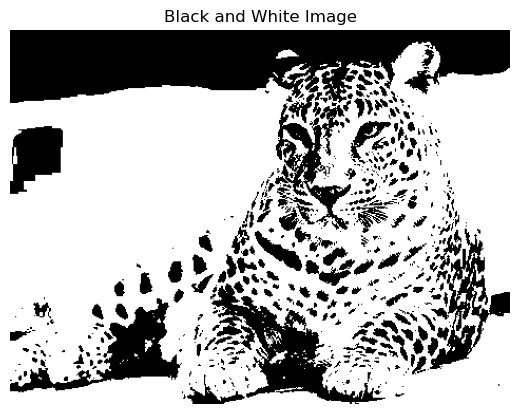

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [17]:
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
bw = gray_to_bw(gray, 100)//255
bw = 1 - bw #invert
#### FOR TESTING ####
# bw = np.array(((0,0,0,0),(0,1,1,0),(0,0,0,0)))
#####################
plotimage(bw, 'Black and White Image', (5,5), invert=invert)
bw

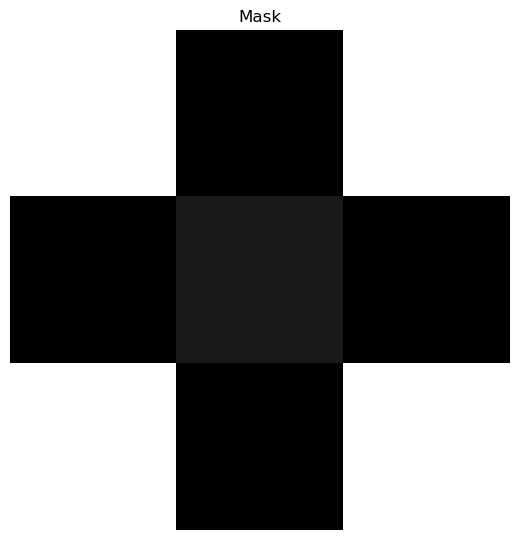

In [18]:
mask = np.array((
 (0,1,0),
 (1,1,1),
 (0,1,0)
), dtype='uint8')
mask_center = (1,1)
mask_plot = 10*mask.copy()
mask_plot[mask_center[0],mask_center[1]]=9
plotimage(mask_plot,'Mask',(5,5), invert=invert)

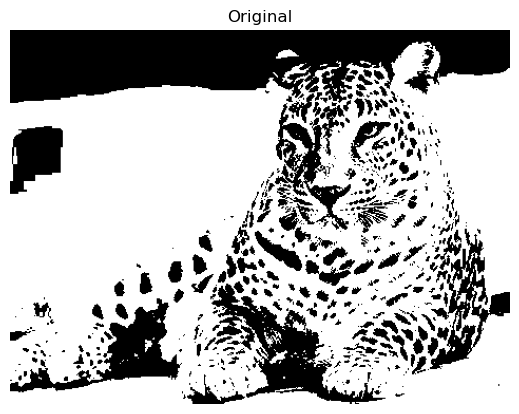

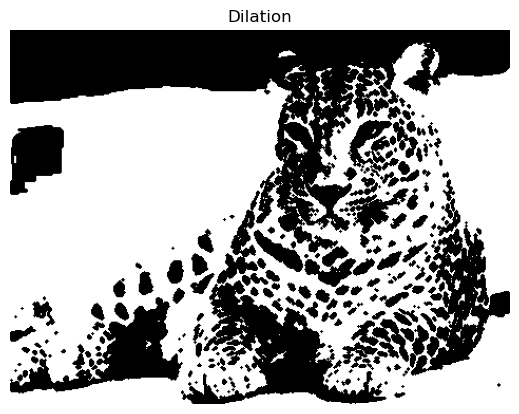

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Define the plotimage function
def plotimage(img, title=None, figsize=None, invert=False):
    if invert:
        img = np.max(img) - img.copy()

    h = img.shape[0]
    w = img.shape[1]
    dpi = 80
    if figsize is None:
        figsize = w / float(dpi), h / float(dpi)
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('off')
    ax.imshow(img, cmap='gray')
    if title:
        plt.title(title)
    plt.show()

# Define the dilation function
def dilation(bw, mask, mask_center):
    res = np.zeros_like(bw)
    maskheight = mask.shape[0] 
    maskwidth = mask.shape[1]
    
    for i in range(0, bw.shape[0] - maskheight + 1):
        for j in range(0, bw.shape[1] - maskwidth + 1):
            if bw[i + mask_center[0], j + mask_center[1]]:
                res[i:i + maskheight, j:j + maskwidth] |= mask
    
    return res

# Define the erosion function
def erosion(bw, mask, mask_center):
    res = np.zeros_like(bw)
    maskheight = mask.shape[0] 
    maskwidth = mask.shape[1]
    
    for i in range(0, bw.shape[0] - maskheight + 1):
        for j in range(0, bw.shape[1] - maskwidth + 1):
            if np.array_equal(bw[i:i + maskheight, j:j + maskwidth] & mask, mask):
                res[i + mask_center[0], j + mask_center[1]] = 1
    
    return res

# Assuming bw, mask, mask_center, and invert are properly defined elsewhere
# Example usage:
d = dilation(bw, mask, mask_center)
plotimage(bw, "Original", (5, 5), invert=invert)
plotimage(d, "Dilation", (5, 5), invert=invert)


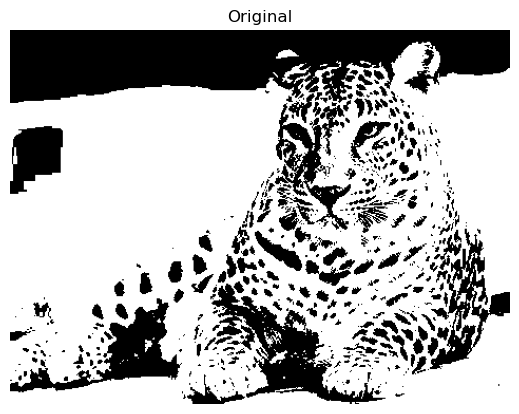

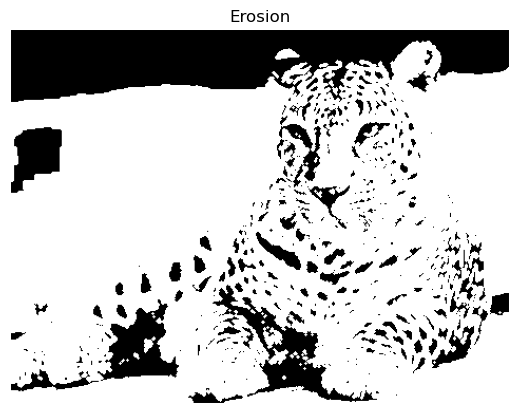

In [20]:
e = erosion(bw, mask, mask_center)
plotimage(bw, "Original",(5,5), invert=invert)
plotimage(e, "Erosion",(5,5), invert=invert)


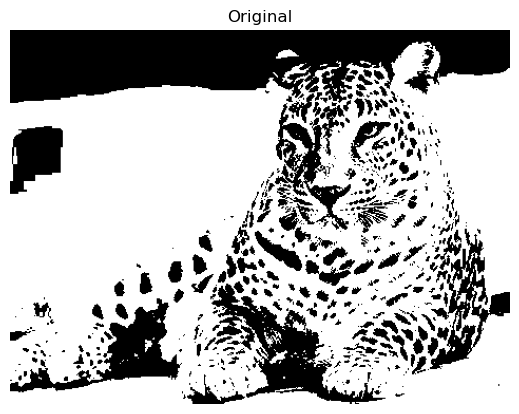

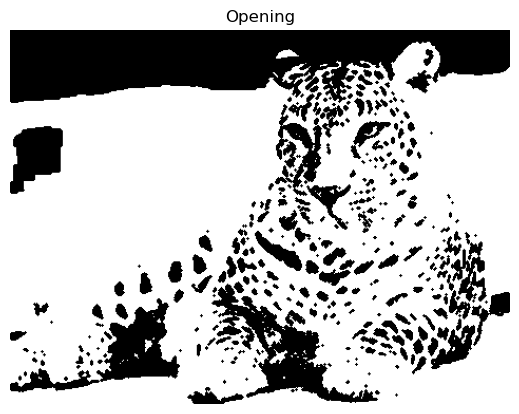

In [21]:
def opening(bw, mask, mask_center):
 return dilation(erosion(bw, mask, mask_center), mask, mask_center)
def closing(bw, mask, mask_center):
 return erosion(dilation(bw, mask, mask_center), mask, mask_center)
o = opening(bw, mask, mask_center)
plotimage(bw, "Original",(5,5), invert=invert)
plotimage(o, "Opening",(5,5), invert=invert)


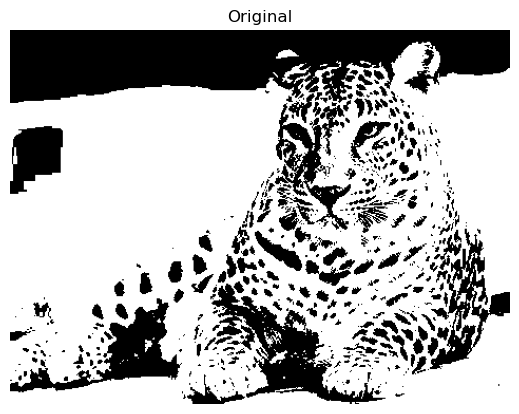

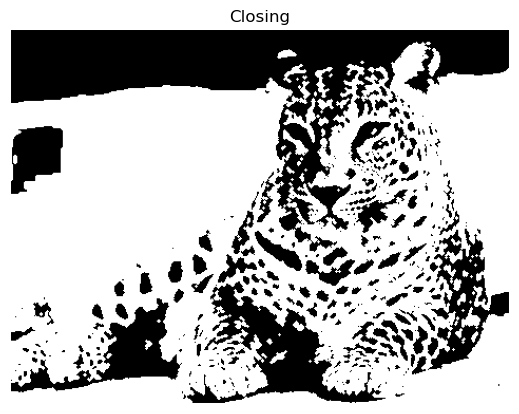

In [22]:
c = closing(bw, mask, mask_center)
plotimage(bw, "Original",(5,5), invert=invert)
plotimage(c, "Closing",(5,5), invert=invert)
